In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Model Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [181]:
Car_data = pd.read_csv('Car_data.csv')
Car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [182]:
Car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [183]:
#encoding categorical data "Fuel_type" column
Car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#encoding categorical data "Seller_type" column
Car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
#encoding categorical data "Transmission" column
Car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [184]:
print (Car_data.shape)
Car_data.tail()

(301, 9)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,1,0,0,0
297,brio,2015,4.00,5.9,60000,0,0,0,0
298,city,2009,3.35,11.0,87934,0,0,0,0
299,city,2017,11.50,12.5,9000,1,0,0,0
300,brio,2016,5.30,5.9,5464,0,0,0,0


In [185]:
#splitting data and target
X=Car_data.drop(['Car_Name','Selling_Price'],axis=1)
Y=Car_data['Selling_Price']

In [186]:
print (X.shape)
X.head()


(301, 7)


,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [187]:
print (Y.shape)
Y.head()

(301,)


0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [188]:
#splitting training and testing data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.11,random_state=2)
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)


(267, 7)
(34, 7)
(267,)
(34,)


Model Training

Linear Regression

In [189]:
Lin_reg = LinearRegression()
Lin_reg.fit(X_train,Y_train)

y_pred = Lin_reg.predict(X_test)

# mean squared error
LR_MSE = mean_squared_error(Y_test, y_pred)
print("Mean squared error: " , LR_MSE)

# r2 score
LR_R2 = r2_score(Y_test, y_pred)
print("R2 score: " , LR_R2)

# mean absolute error
LR_MAE = mean_absolute_error(Y_test, y_pred)
print("Mean absolute error: " , LR_MAE)

Mean squared error:  2.1089921610786053
R2 score:  0.8377942585284475
Mean absolute error:  1.147693947711293


LAsso

In [190]:
Lasso_reg = Lasso()
Lasso_reg.fit(X_train,Y_train)

y_pred = Lasso_reg.predict(X_test)

# mean squared error
Lasso_MSE = mean_squared_error(Y_test, y_pred)
print("Mean squared error: " , Lasso_MSE)

# r2 score
Lasso_R2 = r2_score(Y_test, y_pred)
print("R2 score: " , Lasso_R2)

# mean absolute error
Lasso_MAE = mean_absolute_error(Y_test, y_pred)
print("Mean absolute error: " , Lasso_MAE)


Mean squared error:  1.6347479411306036
R2 score:  0.8742690907990054
Mean absolute error:  1.0352865935568492


Ridge

In [191]:
Ridge_reg = Ridge()
Ridge_reg.fit(X_train,Y_train)

y_pred = Ridge_reg.predict(X_test)

# mean squared error
Ridge_MSE = mean_squared_error(Y_test, y_pred)
print("Mean squared error: " , Ridge_MSE)

# r2 score
Ridge_R2 = r2_score(Y_test, y_pred)
print("R2 score: " , Ridge_R2)

# mean absolute error
Ridge_MAE = mean_absolute_error(Y_test, y_pred)
print("Mean absolute error: " , Ridge_MAE)


Mean squared error:  2.0639244899224156
R2 score:  0.8412604805235767
Mean absolute error:  1.1395612080442372


Decision Tree Regressor

In [192]:
DTR = DecisionTreeRegressor()
DTR.fit(X_train,Y_train)

y_pred = DTR.predict(X_test)

# mean squared error
DTR_MSE = mean_squared_error(Y_test, y_pred)
print("Mean squared error: " , DTR_MSE)

# r2 score
DTR_R2 = r2_score(Y_test, y_pred)
print("R2 score: " , DTR_R2)

# mean absolute error
DTR_MAE = mean_absolute_error(Y_test, y_pred)

Mean squared error:  0.7875735294117645
R2 score:  0.9394265419003416


Random Forest

In [193]:
RF = RandomForestRegressor()
RF.fit(X_train,Y_train)

y_pred_RF = RF.predict(X_test)

# mean squared error
RF_MSE = mean_squared_error(Y_test, y_pred_RF)
print("Mean squared error: " , RF_MSE)

# r2 score
RF_R2 = r2_score(Y_test, y_pred_RF)
print("R2 score: " , RF_R2)

# mean absolute error
RF_MAE = mean_absolute_error(Y_test, y_pred_RF)
print("Mean absolute error: " , RF_MAE)


Mean squared error:  0.3190641044117671
R2 score:  0.9754603025140696
Mean absolute error:  0.3722029411764714


Gradient Boosting Regressor 

In [194]:
GBR = GradientBoostingRegressor()
GBR.fit(X_train,Y_train)

y_pred = GBR.predict(X_test)

# mean squared error
GBR_MSE = mean_squared_error(Y_test, y_pred)
print("Mean squared error: " , GBR_MSE)

# r2 score
GBR_R2 = r2_score(Y_test, y_pred)
print("R2 score: " , GBR_R2)

# mean absolute error
GBR_MAE = mean_absolute_error(Y_test, y_pred)
print("Mean absolute error: " , GBR_MAE)


Mean squared error:  0.2397299672996626
R2 score:  0.9815620096573021
Mean absolute error:  0.3598737670818365


K neighborsRegressor

In [195]:
KNR = KNeighborsRegressor()
KNR.fit(X_train,Y_train)

y_pred = KNR.predict(X_test)

# mean squared error
KNR_MSE = mean_squared_error(Y_test, y_pred)
print("Mean squared error: " , KNR_MSE)

# r2 score
KNR_R2 = r2_score(Y_test, y_pred)
print("R2 score: " , KNR_R2)

# mean absolute error
KNR_MAE = mean_absolute_error(Y_test, y_pred)
print("Mean absolute error: " , KNR_MAE)


Mean squared error:  18.327434705882357
R2 score:  -0.4095904150818286
Mean absolute error:  3.6297058823529413


Model Evaluation

In [196]:

# Model Evaluation
models = pd.DataFrame({ 'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Gradient Boosting Regressor', 'KNeighbors Regressor'], 'Mean Squared Error': [LR_MSE, Lasso_MSE, Ridge_MSE, DTR_MSE, RF_MSE, GBR_MSE, KNR_MSE], 'R2 Score': [LR_R2, Lasso_R2, Ridge_R2, DTR_R2, RF_R2, GBR_R2, KNR_R2], 'Mean Absolute Error': [LR_MAE, Lasso_MAE, Ridge_MAE, DTR_MAE, RF_MAE, GBR_MAE, KNR_MAE] })
models.sort_values(by='Mean Squared Error', ascending=True)



,Model,Mean Squared Error,R2 Score,Mean Absolute Error
5,Gradient Boosting Regressor,0.239730,0.981562,0.359874
4,Random Forest Regressor,0.319064,0.975460,0.372203
3,Decision Tree Regressor,0.787574,0.939427,0.506765
1,Lasso Regression,1.634748,0.874269,1.035287
2,Ridge Regression,2.063924,0.841260,1.139561
0,Linear Regression,2.108992,0.837794,1.147694
6,KNeighbors Regressor,18.327435,-0.409590,3.629706


Graph PLoting

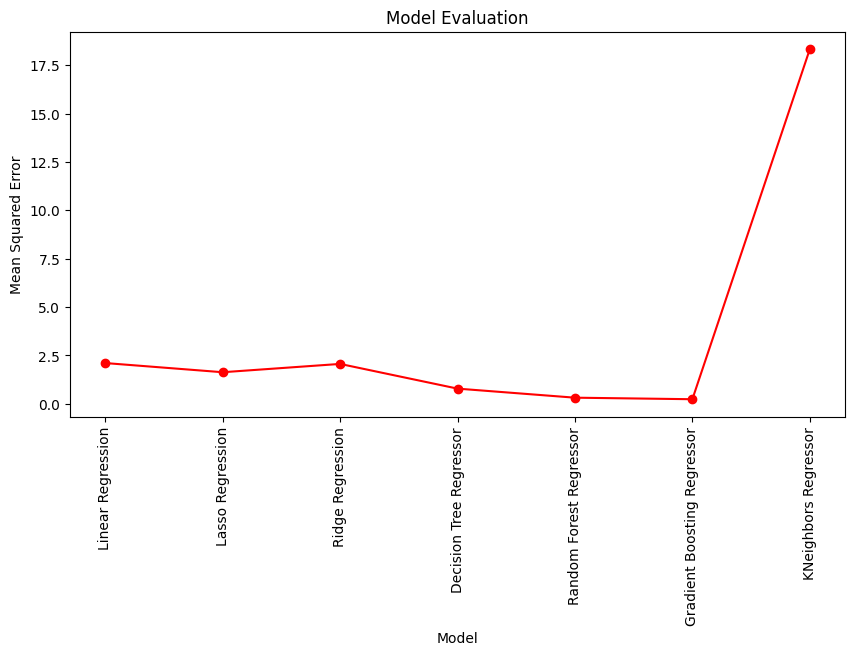

In [197]:
#Plot the model evaluation

plt.figure(figsize=(10,5))
plt.plot(models['Model'], models['Mean Squared Error'], color='red', marker='o')
plt.title('Model Evaluation')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=90)
plt.show()

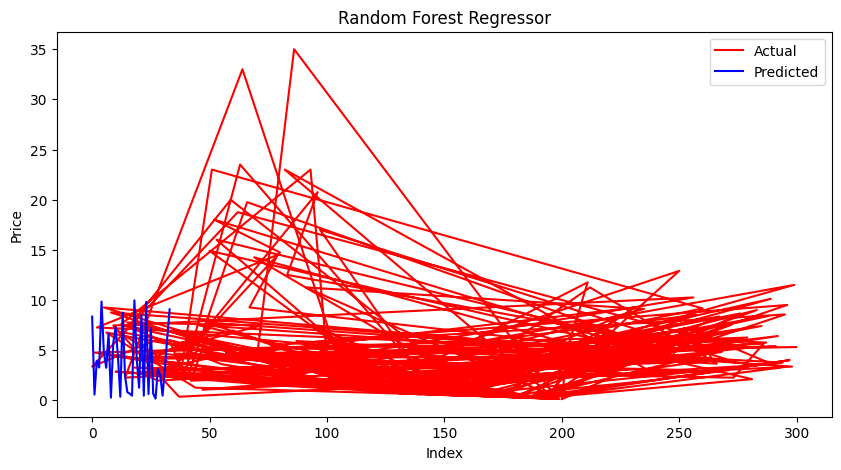

In [198]:
#show the graph for random forest regressor
plt.figure(figsize=(10,5))
plt.plot(Y_train, color='red', label='Actual')
plt.plot(y_pred_RF, color='blue', label='Predicted')
plt.title('Random Forest Regressor')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()